# Library
---

In [2]:
import networkx as nx
from geopy.distance import great_circle
import matplotlib.pyplot as plt
import pandas as pd

# Data Dummy Berdasarkan Koordinat
---

In [ ]:
# --- 1. DATA LOKASI NYATA SEMARANG ---
# # Koordinat (Latitude, Longitude)
# NODE_COORDS = {
#     'V1_Kaligawe': (-6.965, 110.455),
#     'V2_Trimulyo': (-6.953, 110.478),
#     'V3_Tanjung_Emas': (-6.960, 110.400),
#     'V4_Balaikota': (-6.985, 110.420),
#     'V5_Muktiharjo': (-6.972, 110.490),
#     'V6_Jatidiri': (-7.030, 110.415)
# }
# --- DATA LOKASI NYATA SEMARANG (Telah Dikoreksi) ---
NODE_COORDS = {
    'V1_Kaligawe': (-6.960, 110.455),        # KOREKSI
    'V2_Trimulyo': (-6.953, 110.478),        # KOREKSI
    'V3_Tanjung_Emas': (-6.951074575353739, 110.429125), # Tetap
    'V4_Balaikota': (-6.98209338556912, 110.4125041711646), # Tetap
    'V5_Muktiharjo': (-6.972, 110.490),      # KOREKSI
    'V6_Jatidiri': (-7.02182464762319, 110.41007562489979) # Tetap
}
# # --- 1. DATA LOKASI NYATA SEMARANG ---
# # Koordinat (Latitude, Longitude)
# NODE_COORDS = {
#     'V1_Kaligawe': (-6.962290381294127, 110.44775418650617),
#     'V2_Trimulyo': (-6.962290381294127, 110.44775418650617),
#     'V3_Tanjung_Emas': (-6.951074575353739, 110.429125),
#     'V4_Balaikota': (-6.98209338556912, 110.4125041711646),
#     'V5_Muktiharjo': (-6.962290381294127, 110.44775418650617),
#     'V6_Jatidiri': (-7.02182464762319, 110.41007562489979)
# }

# # Faktor Koreksi Jarak Darat (estimasi)
# CORRECTION_FACTOR = 1.4

# Faktor Koreksi Jarak Darat (estimasi)
CORRECTION_FACTOR = 1.4

# Membangun Graph
---

In [4]:
# --- 2. PEMBANGUNAN GRAF BERBOBOT ---
G = nx.Graph()
nodes = list(NODE_COORDS.keys())
G.add_nodes_from(nodes)

print("--- Perhitungan Bobot Jarak Estimasi (Km) ---")
# Hitung jarak antar semua pasangan node dan tambahkan sebagai sisi
for i in range(len(nodes)):
    for j in range(i + 1, len(nodes)):
        node_a = nodes[i]
        node_b = nodes[j]
        coord_a = NODE_COORDS[node_a]
        coord_b = NODE_COORDS[node_b]
        
        distance_straight = great_circle(coord_a, coord_b).kilometers
        weighted_distance = distance_straight * CORRECTION_FACTOR
        
        weight = round(weighted_distance, 2)
        G.add_edge(node_a, node_b, weight=weight)
        print(f"Jarak {node_a} <-> {node_b}: {weight} Km")

--- Perhitungan Bobot Jarak Estimasi (Km) ---
Jarak V1_Kaligawe <-> V2_Trimulyo: 3.72 Km
Jarak V1_Kaligawe <-> V3_Tanjung_Emas: 4.23 Km
Jarak V1_Kaligawe <-> V4_Balaikota: 7.41 Km
Jarak V1_Kaligawe <-> V5_Muktiharjo: 5.72 Km
Jarak V1_Kaligawe <-> V6_Jatidiri: 11.87 Km
Jarak V2_Trimulyo <-> V3_Tanjung_Emas: 7.56 Km
Jarak V2_Trimulyo <-> V4_Balaikota: 11.09 Km
Jarak V2_Trimulyo <-> V5_Muktiharjo: 3.49 Km
Jarak V2_Trimulyo <-> V6_Jatidiri: 15.0 Km
Jarak V3_Tanjung_Emas <-> V4_Balaikota: 5.47 Km
Jarak V3_Tanjung_Emas <-> V5_Muktiharjo: 9.95 Km
Jarak V3_Tanjung_Emas <-> V6_Jatidiri: 11.4 Km
Jarak V4_Balaikota <-> V5_Muktiharjo: 12.08 Km
Jarak V4_Balaikota <-> V6_Jatidiri: 6.2 Km
Jarak V5_Muktiharjo <-> V6_Jatidiri: 14.58 Km


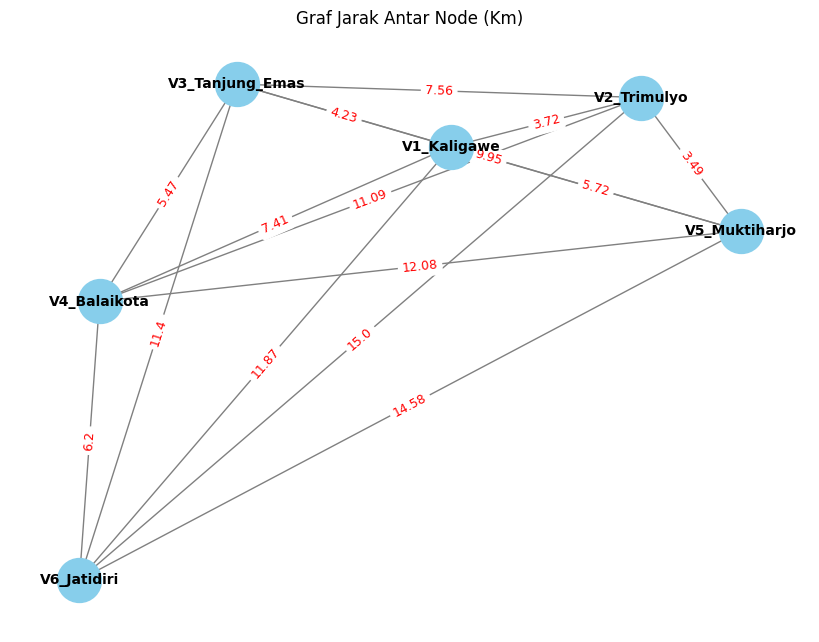

In [8]:
# --- VISUALISASI ---
# Buat posisi node berdasarkan koordinat geografis (disesuaikan agar tampilan rapi)
pos = {node: (coord[1], coord[0]) for node, coord in NODE_COORDS.items()}

plt.figure(figsize=(8, 6))
nx.draw(
    G, pos,
    with_labels=True,
    node_size=1000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray"
)

# --- Tambahkan label bobot pada setiap sisi (garis) ---
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color='red',
    font_size=9,
    label_pos=0.5  # posisi label di tengah garis
)

plt.title("Graf Jarak Antar Node (Km)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


# IMPLEMENTASI ALGORITMA PRIM (menggunakan NetworkX)
---

In [6]:
# --- 3. IMPLEMENTASI ALGORITMA PRIM (menggunakan NetworkX) ---
# nx.minimum_spanning_edges akan mencari MST
# start_node di NetworkX tidak spesifik, ia akan mencari MST dari graf terhubung
mst_edges_data = nx.minimum_spanning_edges(G, weight='weight', data=True)
mst_edges = list(mst_edges_data)

total_weight_mst = sum(data['weight'] for u, v, data in mst_edges)

print("\n=====================================================")
print("HASIL MST: JARINGAN EVAKUASI OPTIMAL (Algoritma Prim)")
print("=====================================================")
for u, v, data in mst_edges:
    print(f"Jalur: {u} -- {v} | Bobot: {data['weight']} Km")

print(f"\nTOTAL JARAK MINIMUM JARINGAN EVAKUASI: {total_weight_mst:.2f} Km")


HASIL MST: JARINGAN EVAKUASI OPTIMAL (Algoritma Prim)
Jalur: V2_Trimulyo -- V5_Muktiharjo | Bobot: 3.49 Km
Jalur: V1_Kaligawe -- V2_Trimulyo | Bobot: 3.72 Km
Jalur: V1_Kaligawe -- V3_Tanjung_Emas | Bobot: 4.23 Km
Jalur: V3_Tanjung_Emas -- V4_Balaikota | Bobot: 5.47 Km
Jalur: V4_Balaikota -- V6_Jatidiri | Bobot: 6.2 Km

TOTAL JARAK MINIMUM JARINGAN EVAKUASI: 23.11 Km


# Visualisasi
---

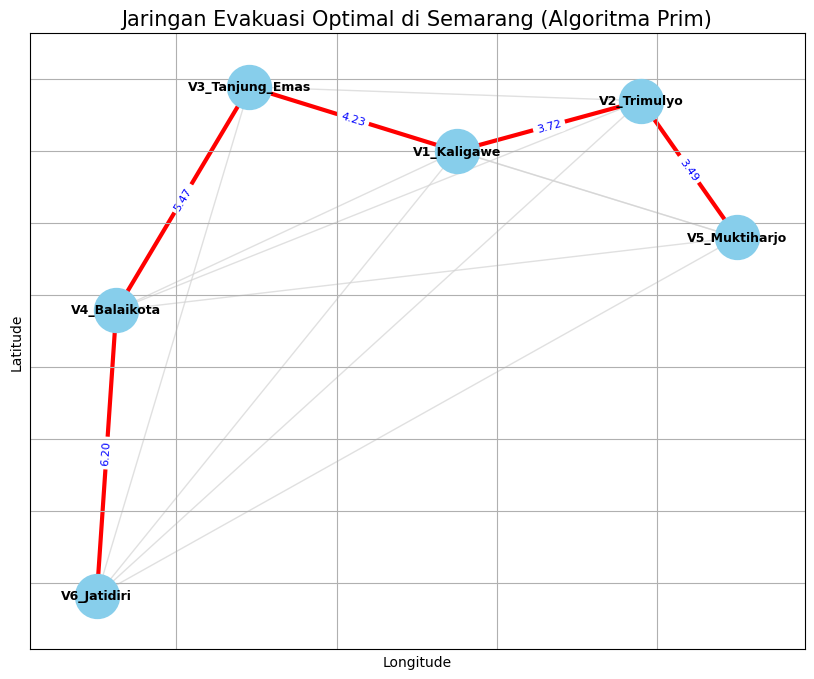


--- Matriks Bobot Jarak Estimasi (Km) ---
    V1_Kaligawe  V2_Trimulyo  V3_Tanjung_Emas V4_Balaikota V5_Muktiharjo V6_Jatidiri 
-------------------------------------------------------------------------------------
V1_Kaligawe 0           3.72        4.23        7.41        5.72        11.87       
V2_Trimulyo 3.72        0           7.56        11.09       3.49        15.00       
V3_Tanjung_Emas4.23        7.56        0           5.47        9.95        11.40       
V4_Balaikota7.41        11.09       5.47        0           12.08       6.20        
V5_Muktiharjo5.72        3.49        9.95        12.08       0           14.58       
V6_Jatidiri 11.87       15.00       11.40       6.20        14.58       0           


In [7]:
# --- 4. VISUALISASI HASIL ---
plt.figure(figsize=(10, 8))

# Atur posisi node berdasarkan koordinat geografis
# Perhatikan bahwa matplotlib memplot (x, y), jadi longitude (garis bujur) adalah x dan latitude (garis lintang) adalah y
pos = {node: (coords[1], coords[0]) for node, coords in NODE_COORDS.items()}

# Gambar semua node
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=1000)

# Gambar semua sisi (edges) dari graf asli sebagai latar belakang abu-abu
all_edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=all_edges, width=1, edge_color='lightgray', alpha=0.7)

# Gambar sisi-sisi yang merupakan bagian dari MST dengan warna merah tebal
mst_edgelist = [(u, v) for u, v, d in mst_edges]
nx.draw_networkx_edges(G, pos, edgelist=mst_edgelist, width=3, edge_color='red')

# Gambar label node
nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold')

# Gambar label bobot pada sisi-sisi MST
edge_labels = nx.get_edge_attributes(G, 'weight')
mst_edge_labels = { (u,v): f"{d['weight']:.2f}" for u,v,d in mst_edges }
# Pastikan label ditempatkan di sisi MST saja
nx.draw_networkx_edge_labels(G, pos, edge_labels=mst_edge_labels, font_color='blue', font_size=8)


plt.title('Jaringan Evakuasi Optimal di Semarang (Algoritma Prim)', size=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# --- Visualisasi Matriks Bobot (Opsional, untuk Bab III) ---
# Anda bisa mencetak matriks bobot untuk ditampilkan di makalah
# Dapatkan daftar node secara berurutan
ordered_nodes = sorted(NODE_COORDS.keys())
# Buat matriks kosong
num_nodes = len(ordered_nodes)
weight_matrix = [[0.0 for _ in range(num_nodes)] for _ in range(num_nodes)]

node_to_idx = {node: i for i, node in enumerate(ordered_nodes)}

for u, v, data in G.edges(data=True):
    idx_u = node_to_idx[u]
    idx_v = node_to_idx[v]
    weight_matrix[idx_u][idx_v] = data['weight']
    weight_matrix[idx_v][idx_u] = data['weight'] # Graf tidak berarah

print("\n--- Matriks Bobot Jarak Estimasi (Km) ---")
# Header kolom
header = "    " + " ".join([f"{n:<12}" for n in ordered_nodes])
print(header)
print("-" * len(header))

for i, row_node in enumerate(ordered_nodes):
    row_str = f"{row_node:<12}"
    for j in range(num_nodes):
        val = weight_matrix[i][j]
        if val == 0 and i != j: # Tidak ada koneksi langsung jika 0 (kecuali diagonal)
            row_str += f"{'-':<12}"
        elif i == j: # Diagonal
            row_str += f"{'0':<12}"
        else:
            row_str += f"{val:<12.2f}"
    print(row_str)

## Perbandingan Dengan Peta Nyata
---

### 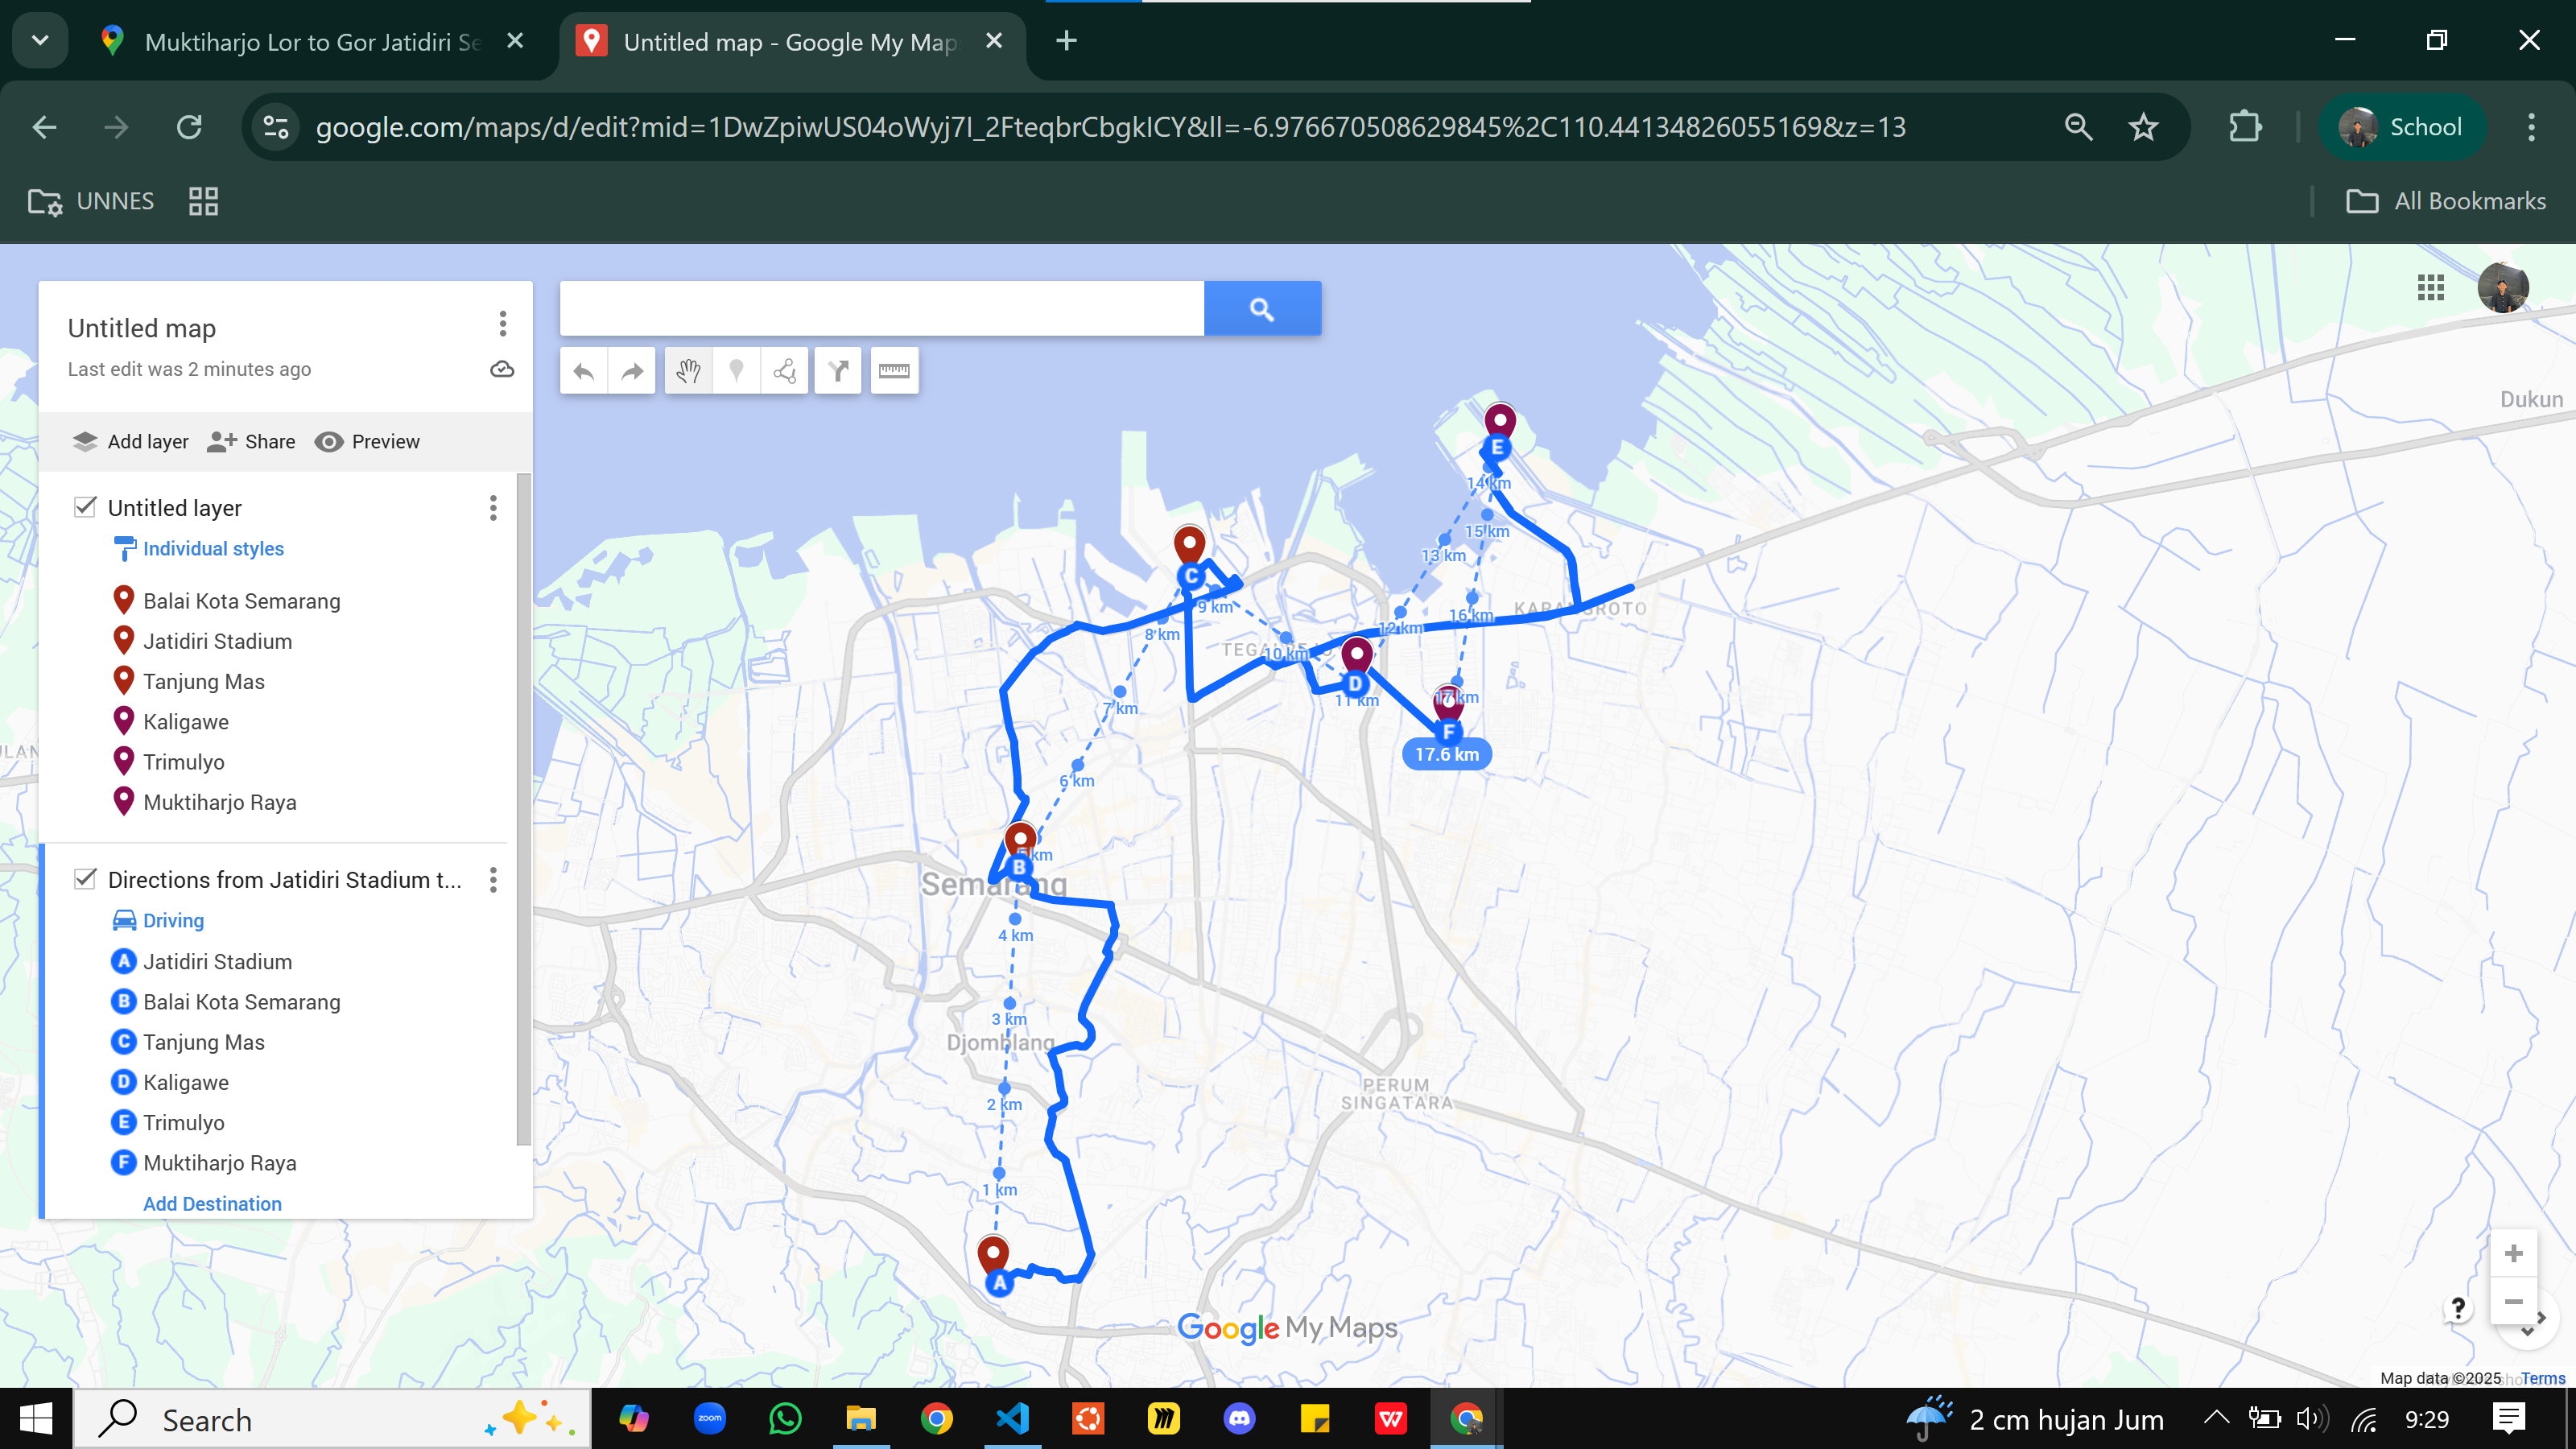